**Random Forest Algorithm**

A Random Forest Algorithm is a supervised machine learning algorithm that is extremely popular and is used for Classification and Regression problems in Machine Learning. We know that a forest comprises numerous trees, and the more trees more it will be robust. Similarly, the greater the number of trees in a Random Forest Algorithm, the higher its accuracy and problem-solving ability.  Random Forest is a classifier that contains several decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset. It is based on the concept of ensemble learning which is a process of combining multiple classifiers to solve a complex problem and improve the performance of the model.

The following steps explain the working Random Forest Algorithm:

**Step 1**: Select random samples from a given data or training set.

**Step 2**: This algorithm will construct a decision tree for every training data.

**Step 3**: Voting will take place by averaging the decision tree.

**Step 4**: Finally, select the most voted prediction result as the final prediction result.

This combination of multiple models is called Ensemble. Ensemble uses two methods:

**Bagging**: Creating a different training subset from sample training data with replacement is called Bagging. The final output is based on majority voting.

**Boosting**: Combing weak learners into strong learners by creating sequential models such that the final model has the highest accuracy is called Boosting.

Bagging: From the principle mentioned above, we can understand Random forest uses the Bagging code. Now, let us understand this concept in detail. Bagging is also known as Bootstrap Aggregation used by random forest. The process begins with any original random data. After arranging, it is organised into samples known as Bootstrap Sample. This process is known as Bootstrapping.Further, the models are trained individually, yielding different results known as Aggregation. In the last step, all the results are combined, and the generated output is based on majority voting. This step is known as Bagging and is done using an Ensemble Classifier.

**Why Use a Random Forest Algorithm?**

There are a lot of benefits to using Random Forest Algorithm, but one of the main advantages is that it reduces the risk of overfitting and the required training time. Additionally, it offers a high level of accuracy. Random Forest algorithm runs efficiently in large databases and produces highly accurate predictions by estimating missing data.

**Important Hyperparameters**

Hyperparameters are used in random forests to either enhance the performance and predictive power of models or to make the model faster.

The following hyperparameters are used to enhance the predictive power:

**n_estimators**: Number of trees built by the algorithm before averaging the products.

**max_features**: Maximum number of features random forest uses before considering splitting a node.

**mini_sample_leaf**: Determines the minimum number of leaves required to split an internal node.

The following hyperparameters are used to increase the speed of the model:

**n_jobs**: Conveys to the engine how many processors are allowed to use. If the value is 1, it can use only one processor, but if the value is -1,, there is no limit.

**random_state**: Controls randomness of the sample. The model will always produce the same results if it has a definite value of random state and if it has been given the same hyperparameters and the same training data.
oob_score: OOB (Out Of the Bag) is a random forest cross-validation method. In this, one-third of the sample is not used to train the data but to evaluate its performance.

**Random Forest Example**

Cardiotocography (CTG) is used during pregnancy to monitor fetal heart rate and uterine contractions. It is monitor fetal well-being and allows early detection of fetal distress.

CTG interpretation helps in determining if the pregnancy is high or low risk. An abnormal CTG may indicate the need for further investigations and potential intervention.

In this project, I will create a model to classify the outcome of Cardiotocogram test to ensure the well being of the fetus.

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
np.random.seed(0)

In [ ]:
data = pd.read_csv("fetal_health.xls")
data.head()

In [ ]:
data.info()

In [ ]:
data.describe().T

In [ ]:
#first of all let us evaluate the target and find out if our data is imbalanced or not

colours=["#f7b2b0","#8f7198", "#003f5c"]
sns.countplot(data= data, x="fetal_health",palette=colours)

In [ ]:
#correlation matrix
corrmat= data.corr()
plt.figure(figsize=(15,15))

cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)


In [ ]:
sns.lmplot(data =data,x="accelerations",y="fetal_movement",palette=colours, hue="fetal_health",legend_out=False)
plt.show()

In [ ]:
sns.lmplot(data =data,x="prolongued_decelerations",y="fetal_movement",palette=colours, hue="fetal_health",legend_out=False)
plt.show()

In [ ]:
sns.lmplot(data =data,x="abnormal_short_term_variability",y="fetal_movement",palette=colours, hue="fetal_health",legend_out=False)
plt.show()

In [ ]:
sns.lmplot(data =data,x="mean_value_of_long_term_variability",y="fetal_movement",palette=colours, hue="fetal_health",legend_out=False)
plt.show()

In [ ]:
# columns for detailed visualisation
cols=['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability']


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 49.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-13-37cd86d97b52>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["fetal_health"], y=data[i], palette=colours)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 59.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


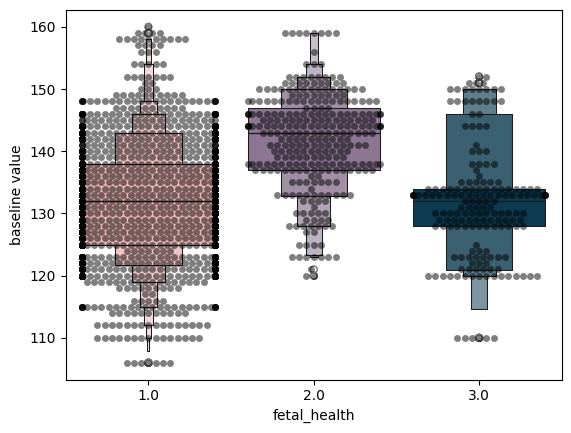

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 76.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 75.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 68.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-13-37cd86d97b52>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["fetal_health"], y=data[i], palette=colours)
/usr/local/lib/python3.10/dist-packages/seaborn/cat

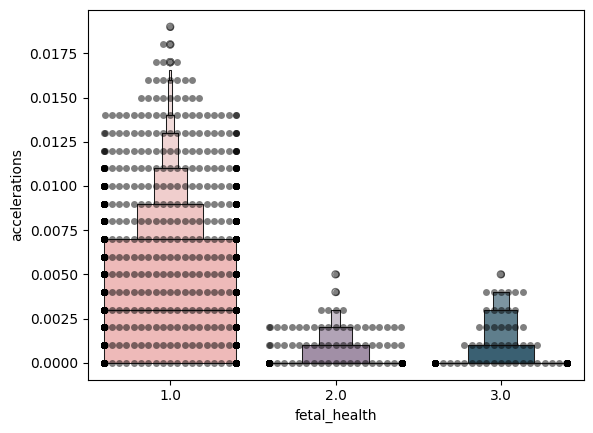

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 90.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 74.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 69.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-13-37cd86d97b52>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["fetal_health"], y=data[i], palette=colours)
/usr/local/lib/python3.10/dist-packages/seaborn/cat

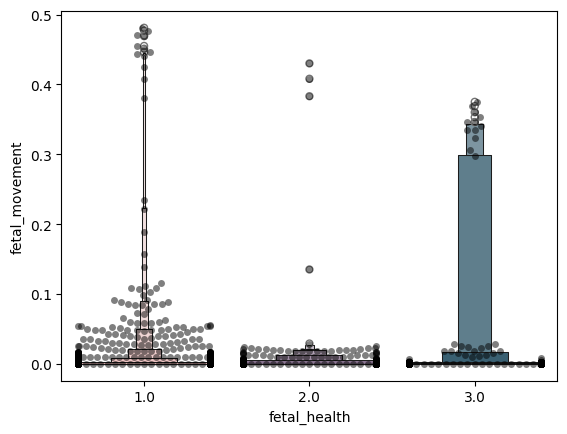

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 81.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 34.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 17.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-13-37cd86d97b52>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["fetal_health"], y=data[i], palette=colours)
/usr/local/lib/python3.10/dist-packages/seaborn/cat

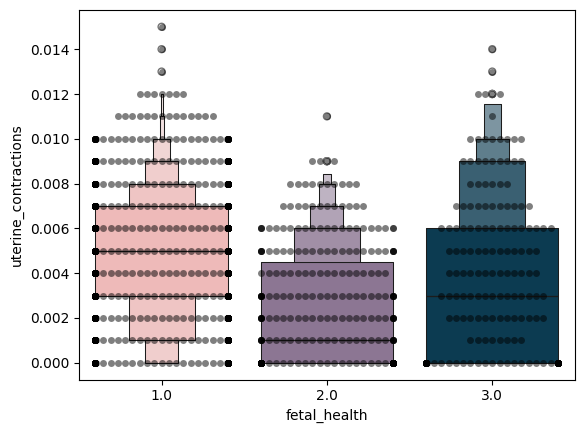

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 82.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 72.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 26.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-13-37cd86d97b52>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["fetal_health"], y=data[i], palette=colours)
/usr/local/lib/python3.10/dist-packages/seaborn/cat

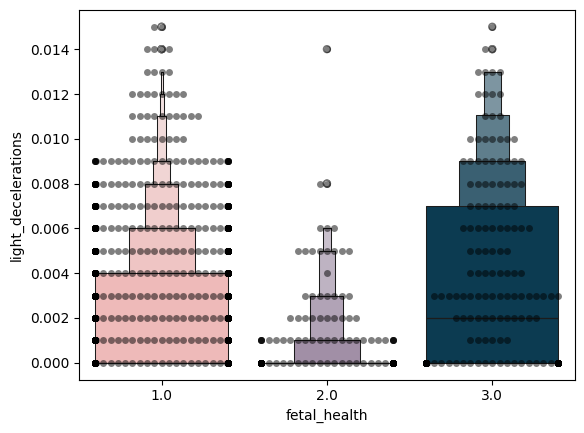

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 98.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 91.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 82.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-13-37cd86d97b52>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["fetal_health"], y=data[i], palette=colours)
/usr/local/lib/python3.10/dist-packages/seaborn/cat

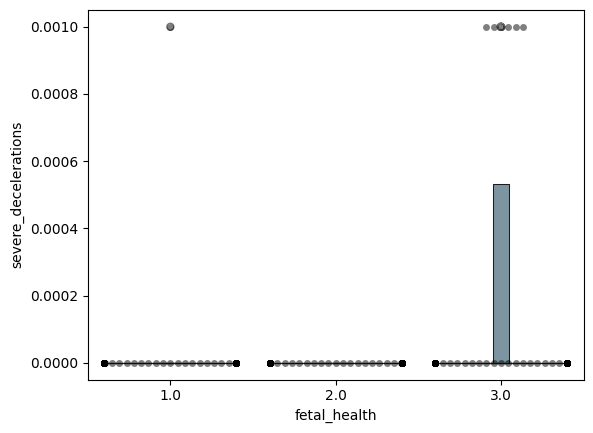

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 96.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 86.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 47.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-13-37cd86d97b52>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["fetal_health"], y=data[i], palette=colours)
/usr/local/lib/python3.10/dist-packages/seaborn/cat

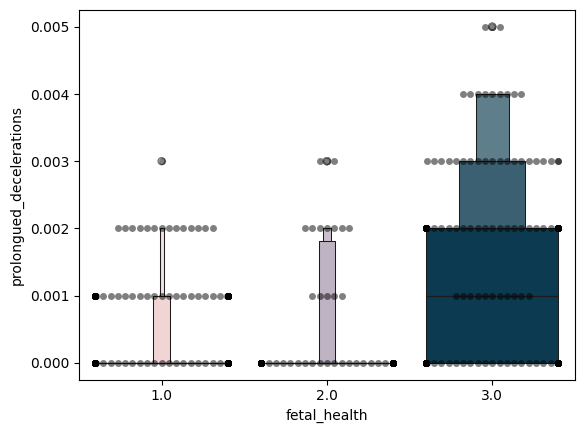

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 53.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 10.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-13-37cd86d97b52>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["fetal_health"], y=data[i], palette=colours)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 65.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/cat

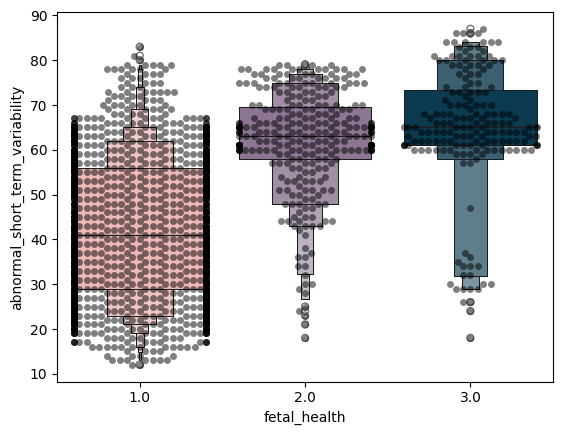

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 74.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 54.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-13-37cd86d97b52>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["fetal_health"], y=data[i], palette=colours)
/usr/local/lib/python3.10/dist-packages/seaborn/cat

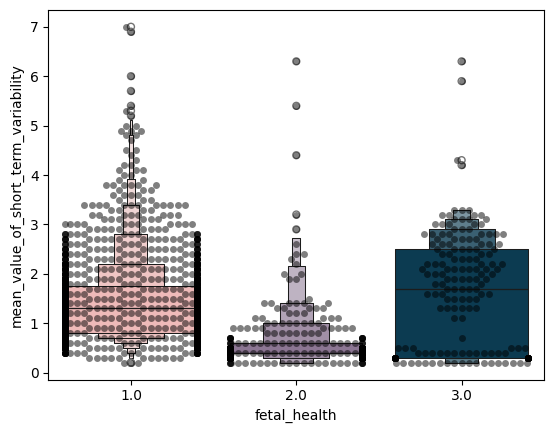

In [ ]:
for i in cols:
    sns.swarmplot(x=data["fetal_health"], y=data[i], color="black", alpha=0.5 )
    sns.boxenplot(x=data["fetal_health"], y=data[i], palette=colours)
    plt.show()

In [ ]:
shades =["#f7b2b0","#c98ea6","#8f7198","#50587f", "#003f5c"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = data,palette = shades)
plt.xticks(rotation=90)
plt.show()


In [ ]:
#assigning values to features as X and target as y
X=data.drop(["fetal_health"],axis=1)
y=data["fetal_health"]

#Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)
X_df.describe().T


In [ ]:
#looking at the scaled features
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_df,palette = shades)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.3,random_state=42)

In [ ]:
#A quick model selection process
#pipelines of models( it is short was to fit and pred)
pipeline_lr=Pipeline([('lr_classifier',LogisticRegression(random_state=42))])

pipeline_dt=Pipeline([ ('dt_classifier',DecisionTreeClassifier(random_state=42))])

pipeline_rf=Pipeline([('rf_classifier',RandomForestClassifier())])

pipeline_svc=Pipeline([('sv_classifier',SVC())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_svc]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest', 3: "SVC"}


# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

#cross validation on accuracy
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train, cv=10 )
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

In [ ]:
#taking look at the test set
pred_rfc = pipeline_rf.predict(X_test)
accuracy = accuracy_score(y_test, pred_rfc)
print(accuracy)

In [ ]:
#Building a dictionalry with list of optional values that will me analyesed by GridSearch CV
parameters = {
    'n_estimators': [100,150, 200,500,700,900],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,6,8,12,14,16],
    'criterion' :['gini', 'entropy'],
    'n_jobs':[-1,1,None]
}

#Fitting the trainingset to find parameters with best accuracy

CV_rfc = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters, cv= 5)
CV_rfc.fit(X_train, y_train)

#Getting the outcome of gridsearch

CV_rfc.best_params_


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

In [ ]:
RF_model = RandomForestClassifier(**CV_rfc.best_params_)
RF_model.fit(X_train, y_train)
#Testing the Model on test set
predictions=RF_model.predict(X_test)
acccuracy= accuracy_score(y_test,predictions)
acccuracy

In [ ]:
acccuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, average="weighted")
precision = precision_score(y_test, predictions, average="weighted")
f1_score = f1_score(y_test, predictions, average="micro")

print("********* Random Forest Results *********")
print("Accuracy    : ", acccuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("F1 Score    : ", f1_score)

In [ ]:
print(classification_report(y_test, predictions))

In [ ]:
# cofusion matrix
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=cmap,annot = True, annot_kws = {'size':15})